In [45]:
import pandas as pd   #to use read_csv(), crosstab()
import numpy as np    #to use exponentiation : exp()
import matplotlib.pyplot as plt #for tight_layout()
import pylab as pyl #for generating plots: show()
import statsmodels.api as sm  #to use the Logit()
from sklearn import preprocessing
import pylab as pyl #for generating plots: show()

In [46]:
# importando o dataset
mydata = pd.read_csv('dataset/data-set-clube-new-v2.csv', sep=';')

In [47]:
# tamanho do dataset
print(mydata.shape) #768*9

(3027, 6)


In [59]:
mydata.head(5) 

,id_socio,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano,int
0,38810,CANCELADO,24,0,0,0,1
1,54088,CANCELADO,0,0,0,0,1
2,31324,CANCELADO,12,1,2,4,1
3,34368,CANCELADO,9,1,2,0,1
4,27004,CANCELADO,14,1,0,7,1


In [49]:
# resumindo os dados
print(mydata.describe())

           id_socio  qtde_em_aberto  qtde_em_dia  qtde_em_atraso  \
count   3027.000000     3027.000000  3027.000000     3027.000000   
mean   23457.673274       10.601255     4.386852        3.212752   
std    14843.083641       10.743290     7.017163        5.761192   
min        3.000000        0.000000     0.000000        0.000000   
25%    10650.500000        0.000000     0.000000        0.000000   
50%    25490.000000       10.000000     0.000000        0.000000   
75%    35382.500000       24.000000     6.000000        4.000000   
max    54485.000000       55.000000    53.000000       39.000000   

       qtde_frequencia_ano  
count          3027.000000  
mean             16.846383  
std              42.621343  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%              12.000000  
max             490.000000  


In [50]:
# desvio padrão de cada coluna
mydata.std()

id_socio               14843.083641
qtde_em_aberto            10.743290
qtde_em_dia                7.017163
qtde_em_atraso             5.761192
qtde_frequencia_ano       42.621343
dtype: float64

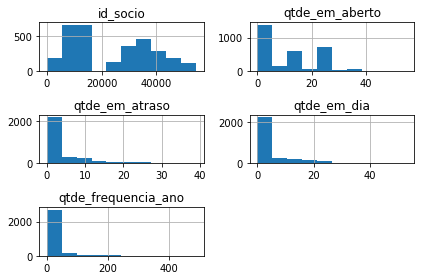

In [51]:
# histogramas de plotagem de todas as colunas
mydata.hist()


plt.tight_layout() # tight_layout(): ajustando o espaçamento entre subparcelas para minimizar as sobreposições.
pyl.show()         

In [64]:
# criando explicitamente um espaço reservado para interceptação em y: b0
mydata['int']=1
mydata.head()

,id_socio,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano,int
0,38810,CANCELADO,24,0,0,0,1
1,54088,CANCELADO,0,0,0,0,1
2,31324,CANCELADO,12,1,2,4,1
3,34368,CANCELADO,9,1,2,0,1
4,27004,CANCELADO,14,1,0,7,1


In [65]:
# Passando os todas as colunas para o tipo inteiro

label_encoder = preprocessing.LabelEncoder()

df['id_socio'] = label_encoder.fit_transform(df['id_socio'])
df['status'] = label_encoder.fit_transform(df['status'])
df['qtde_em_aberto'] = label_encoder.fit_transform(df['qtde_em_aberto'])
df['qtde_em_dia'] = label_encoder.fit_transform(df['qtde_em_dia'])
df['qtde_em_atraso'] = label_encoder.fit_transform(df['qtde_em_atraso'])

print (df.dtypes)

id_socio               int64
status                 int64
qtde_em_aberto         int64
qtde_em_dia            int64
qtde_em_atraso         int64
qtde_frequencia_ano    int64
dtype: object


In [70]:
# O modelo de regressão logística nos fornece coeficientes para colocar na fórmula:
# y= b0 + b1*NPG + + b2*PGL+ b3*DIA + b4*TSF + b5*INS + b6*BMI + b7*DPF + b8*AGE



[[2464    1   24    0    0    0]
 [3010    1    0    0    0    0]
 [1885    1   12    1    2    4]
 ...
 [3024    0    2    1    0    1]
 [3025    0    0    1    0    0]
 [2914    0   47    4   12   15]]


In [68]:
# declarando as variáveis independentes, incluindo a interceptação
# criando o Modelo Logistic Regression
# ajustanto o modelo

# independentVar= ['id_socio','qtde_em_aberto','qtde_em_dia','qtde_em_atraso','qtde_frequencia_ano','int']
# model1= sm.Logit(mydata['status'], mydata[independentVar])
# answer= model1.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).